---
title: "2 - Utility and investor types"
author: "Espen Sirnes"
date: "2024-9-18"
format:
  pdf:
    number-sections: true
    geometry: [left=4cm, right=4cm, top=4cm, bottom=4cm]
    fontsize: 12pt
    fontfamily: times
    monofont: "Courier New"
    documentclass: article
    toc: true
    fig-cap: true
    fig-pos: H
    titlepage: true
    titlepage-text-color: "000000"
    titlepage-rule-color: "000000"
    titlepage-rule-height: 2
---

# Expected Utility

In finance, the utility function is typically defined as the utility derived from a certain amount $x$. It is generally assumed that greater wealth yields higher utility, hence the utility function should be increasing, meaning $U'(x) > 0$. In situations involving risk, such as holding shares with uncertain future values, it becomes useful to measure the utility of such assets considering their risk and expected return. This is commonly referred to as *expected utility*. The expected utility for a portfolio is defined as follows:

For a discrete random variable:

$$
U(X) = \mathbb{E}[u(X)] = \sum_{i=1}^{N} P(x_i) u(x_i),
$$

where $P(x_i)$ is the probability that $X$ assumes the value $x_i$, and $u(x_i)$ represents the utility derived if that event occurs. For a continuous distribution, the expected utility is given by:

$$
U(X) = \mathbb{E}[u(X)] = \int_{-\infty}^{\infty} f(x) u(x) \, dx,
$$

where $f(x)$ is the density function of $X$, such as the normal distribution.

A key outcome of this model is that with a concave utility function, an individual will always prefer a guaranteed cash flow over a speculative investment with the same expected return. This behavior is illustrated by the following example.

## An Example

Consider an individual with a logarithmic utility function:

$$
u(x) = \ln(x),
$$

which is concave, as shown by its first and second derivatives:

$$
u'(x) = \frac{1}{x}, \\
u''(x) = -\frac{1}{x^2} < 0.
$$

Suppose there is a 50% chance of $x=0.5$ and a 50% chance of $x=1.5$. This setup implies that $X = \{0.5, 1.5\}$ with probability distribution $P(X) = \{0.5, 0.5\}$, leading to an expected value of $\mathbb{E}X=1$. The expected utility is thus calculated as:

In [ ]:
import numpy as np

# Values and probabilities
x_values = np.array([0.5, 1.5])
probabilities = np.array([0.5, 0.5])

# Expected utility
expected_utility = np.sum(probabilities * np.log(x_values))
expected_utility

By comparing the utility of the expected return of 1 with the expected utility, we observe:

$$
u(\mathbb{E}X) = \ln(1) > \ln(\sqrt{0.75}) = \mathbb{E}u(X),
$$

indicating that the utility of a certain outcome ($\ln(1)$) is preferred over the expected utility of a gamble ($\ln(\sqrt{0.75})$). This preference underscores risk aversion, as illustrated in the following plot:

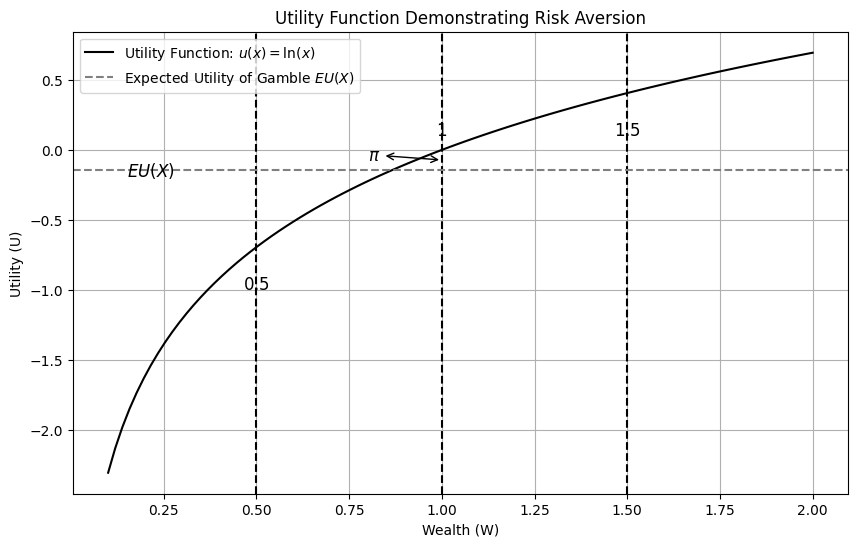

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Logarithmic utility function
def u_func(x):
    return np.log(x)

def x_func(u):
    return np.exp(u)

# Values for wealth and utility
x_vals = np.linspace(0.1, 2, 100)
u_x = u_func(x_vals)

# Gamble outcomes
x_gamble = [0.5, 1.5]  # Outcomes of the gamble
p_gamble = [0.5, 0.5]  # Probabilities

# Certain outcome
x_certain = 1

# Expected utility of the gamble
expected_utility = np.sum(np.array(p_gamble) * u_func(np.array(x_gamble)))

# Plotting the utility function
plt.figure(figsize=(10, 6))
plt.plot(x_vals, u_x, label=r'Utility Function: $u(x) = \ln(x)$', color='black')

# Plotting the certain outcome
plt.axvline(x=x_certain, color='black', linestyle='--')
plt.text(x_certain, u_func(x_certain) + 0.1, "$1$", horizontalalignment='center', fontsize=12)

# Plotting the gamble outcomes
plt.axvline(x=x_gamble[0], color='black', linestyle='--')
plt.axvline(x=x_gamble[1], color='black', linestyle='--')
plt.text(x_gamble[0], u_func(x_gamble[0]) - 0.3, "$0.5$", horizontalalignment='center', fontsize=12)
plt.text(x_gamble[1], u_func(x_gamble[1]) - 0.3, "$1.5$", horizontalalignment='center', fontsize=12)

# Plotting the expected utility
plt.axhline(y=expected_utility, color='gray', linestyle='--', label='Expected Utility of Gamble $EU(X)$')
plt.text(0.15, expected_utility, '$EU(X)$', verticalalignment='center', fontsize=12)

# Risk premium - distance between expected utility and utility of certain outcome
risk_premium = u_func(x_certain) - expected_utility
plt.annotate(r'$\pi$', xy=(1, expected_utility + risk_premium/2), xytext=(0.8, expected_utility + risk_premium/2),
             arrowprops=dict(facecolor='black', arrowstyle='<->'), fontsize=12)

# Labels and title
plt.title('Utility Function Demonstrating Risk Aversion')
plt.xlabel('Wealth (W)')
plt.ylabel('Utility (U)')
plt.legend()
plt.grid(True)

It is important to note that the expected utility of a gamble, represented by the value midway between 0.5 and 1.5, is lower than the gamble's expected value. Consequently, a risk-averse investor will invariably prefer a certain payment of 1 over the gamble.

## Investor Types

The shape of a utility function critically influences how individuals respond to risk. This subsection discusses three primary types of investors based on their risk preferences and the corresponding shapes of their utility functions.

- **Risk-Averse Investors:** These individuals have concave utility functions, indicating a preference for certain outcomes over uncertain ones with the same expected value. Commonly modeled in financial theory, risk-averse investors prioritize minimizing risk over maximizing returns. They tend to diversify their portfolios across various asset classes to reduce volatility. Even with the option of unlimited borrowing, they typically opt to limit their investment exposure.

- **Risk-Neutral Investors:** For risk-neutral individuals, volatility is inconsequential. Their utility functions are linear, reflecting indifference to the level of risk associated with any investment. They focus solely on maximizing expected returns and are likely to invest in the asset with the highest expected payoff, irrespective of the associated risks. This type of investor is willing to allocate as much capital as possible to maximize potential gains.

- **Risk-Loving (Risk-Seeking) Investors:** Risk lovers have convex utility functions and engage in behaviors akin to gambling, where the expected return is typically negative. They derive satisfaction from the risk itself and often pursue investments that offer the highest possible returns, irrespective of the high levels of risk involved. Such behavior is commonly seen in speculative ventures and high-stakes gambling.

Interestingly, it is not uncommon for individuals to display traits of both risk-averse and risk-seeking behaviors, a phenomenon that may seem paradoxical. For instance, the same person might purchase insurance (a risk-averse action) while also indulging in lottery gambling (a risk-seeking behavior). This can be explained by the utility function's varying shape at different levels of wealth or stakes: a person might be risk-seeking with small, disposable amounts of money but risk-averse with larger, life-impacting sums. This dual nature influences how individuals choose to allocate their investments across different risk levels.


## Assumptions in a Financial Market

In financial theory, the assumption typically made about market participants is that they are predominantly risk averse. This assumption is crucial as portfolio optimization and related strategies largely rely on this characteristic. Risk-neutral or risk-loving investors, who either disregard risk or actively seek it, are considered exceptions rather than the norm in these models. This foundational assumption allows for the development of investment strategies that aim to maximize returns while minimizing risk, aligning with the preferences of risk-averse individuals.

# The Risk Premium

We understand that a risk-averse individual has a concave utility function, indicated by $u^{\prime \prime}(x) < 0$. But how do we quantify the degree of risk aversion?

A direct approach might be to use the second derivative of the utility function, $u^{\prime \prime}(x)$, as a measure of risk aversion. However, this method has limitations, particularly at higher wealth levels. The issue arises because the curvature of the utility function tends to flatten as wealth increases, implying a decrease in relative risk aversion. If we solely relied on $u^{\prime \prime}(x)$ for measuring risk aversion, it might inaccurately suggest that wealthier individuals become nearly risk-neutral, due to the diminishing curvature in their utility functions. This phenomenon can be explained by the principle of decreasing marginal utility, which asserts that the incremental value or utility derived from each additional unit of wealth diminishes at higher wealth levels.

## Absolute Risk Aversion (ARA)

A more nuanced measure of risk aversion is defined through the Absolute Risk Aversion (ARA) index, given by:

$$
\pi_{ARA}(x) = -\frac{u''(x)}{u'(x)} \label{Risikoaversjon}
$$

This metric, also known as the Arrow-Pratt measure of risk aversion, remains robust against the non-linear scaling of wealth. As wealth increases, both the second derivative $u''(x)$ and the first derivative $u'(x)$ typically decrease, but their ratio, representing the ARA, adjusts proportionally. Thus, the measure of risk aversion does not necessarily approach zero as wealth grows, providing a more reliable indicator across different wealth levels.

This measure is intrinsically linked to the concept of the risk premium.

### The Risk Premium

The risk premium is essentially the extra amount that a person requires to be compensated for taking on a risky bet instead of receiving a certain payment.

Consider the earlier example, where the decision involves a choice between a certain payment and a gamble with a 50% probability each for outcomes 0.5 and 1.5:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculating risk premium
risk_premium = 1 - np.sqrt(0.75)
risk_premium

# Plot utility-risk-premium
x_vals = np.linspace(0.1, 2, 100)
utility_vals = np.log(x_vals)

plt.figure(figsize=(8, 5))
plt.plot(x_vals, utility_vals, label='Utility Function')
plt.axhline(y=np.log(np.sqrt(0.75)), color='r', linestyle='--', label='Expected Utility of Gamble')
plt.axhline(y=0, color='g', linestyle='--', label='Utility of $1$')
plt.xlabel('Wealth (x)')
plt.ylabel('Utility (u(x))')
plt.title('Graphical illustration of the risk premium determination')
plt.legend()
plt.grid(True)
plt.show()

The risk premium $ \pi $ is the difference between the certain amount of 1 and the amount that equates to this utility level:

$$
\ln(1-\pi) = \ln(\sqrt{0.75}),
$$

resulting in:

$$
\pi = 1 - \sqrt{0.75} \approx 0.14.
$$

This quantification of $ \pi $ as a risk premium measure underscores its relevance and frequent use in financial analyses.

### Constant Absolute Risk Aversion (CARA)

If ARA is constant, we refer to it as Constant Absolute Risk Aversion (CARA). The utility function aligning with CARA can be derived by solving the differential equation $ \pi_{CARA} = -u''/u' $, which provides:

$$
u(x) = -e^{-x \cdot \pi_{CARA}} \label{CARAUtility}
$$

Although the CARA utility function is negative, it should not be interpreted as the individual deriving negative utility from wealth. Instead, it serves as a ranking mechanism among different wealth levels, ensuring $ u(x) > u(y) $ whenever $ x > y $.

This utility specification simplifies calculations and is extensively used due to its mathematical tractability. It also implies that for a CARA utility function, the risk premium can be calculated exactly as $\frac{1}{2} \pi_{ARA} \sigma^2$.

## Relative Risk Aversion (RRA)

Relative Risk Aversion (RRA) is more applicable when the risky decision involves a proportion of an individual's wealth, rather than a fixed amount. This measure is particularly relevant when returns are expressed as a percentage of wealth, aligning more closely with practical financial scenarios. RRA is mathematically defined as:

$$
\pi_{RRA}(x) = -x \frac{u''(x)}{u'(x)}
$$

The choice between using Absolute Risk Aversion (ARA) and RRA depends on the nature of the risk involved. RRA is preferred when analyzing bets that are proportional to wealth, while ARA is more suitable for fixed-level bets.

For consistency in utility functions that maintain a constant RRA, a Cobb-Douglas-type function is typically used:

$$
u_{CRRA}(x) = x^{1-\pi_{CARA}}
$$

# Definitions of Risk Attitude

Risk attitudes can be quantified and described in several ways, each reflecting a different aspect of how individuals evaluate risk and uncertainty.


## Concavity

A continuous utility function indicates risk aversion if it is concave, meaning that $u''(x) < 0$. This shows a decreasing marginal utility with increasing wealth. However, the magnitude of the second derivative is not always an accurate indicator of the degree of risk aversion due to its dependence on wealth levels.

## Risk Coefficient

The risk coefficient, whether ARA or RRA, quantifies risk attitudes numerically. A positive risk coefficient denotes risk aversion, with higher values indicating stronger aversion to risk.

## Risk Premium

The risk premium is the additional amount a risk-averse individual requires to accept a risky proposition over a certain outcome. A higher risk premium signals greater risk aversion. This metric is crucial for financial decision-making, reflecting how much extra return an investor demands to compensate for the risk involved.

## Expectation

The principle of risk aversion can be quantified by comparing the utility of the expectation of a random amount with the expectation of the utility itself. If the utility of the expected value of a random amount exceeds the expected utility of the amounts, the individual is characterized as risk averse. The greater the difference, the more pronounced the risk aversion:

$$
u(\mathbb{E}x) > \mathbb{E}u(x) \label{Ineq}
$$

Using a Taylor expansion around the mean for both terms and taking their difference, we derive:

$$
u(\mathbb{E}x) - \mathbb{E}u(x) = -\frac{1}{2} \mathrm{var}(x) u''(x)
$$

This result directly links to the concavity of the utility function, as highlighted by Jensen's inequality. This mathematical principle asserts that the expectation of a concave function is always less than the function of the expectation, reinforcing the inequality (\ref{Ineq}) as long as $u(x)$ remains concave.

# The Normal Distribution

Discussing risk in financial markets often involves examining the underlying probability distributions. For example, under the assumption that returns on the Oslo Stock Exchange follow a normal distribution, statistically extreme changes exceeding 10% would be exceedingly rare—estimated to occur once every 17,000 years. Yet, during the 2008 financial crisis, such anomalies were observed twice.

Critics like Nassim Taleb argue that the normal distribution poorly represents financial market risks because it underestimates the probability of extreme events. However, this perspective may overlook the adaptability of financial models which can incorporate changing risk profiles over time.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Plot mixed normal distribution with fat tails
x_vals = np.linspace(-4, 4, 1000)
fat_tails = 0.8 * norm.pdf(x_vals, loc=0, scale=1) + 0.2 * norm.pdf(x_vals, loc=0, scale=2)

# Plotting normal distribution vs mixed normal
plt.figure(figsize=(8, 5))
plt.plot(x_vals, norm.pdf(x_vals, loc=0, scale=1), label="Normal Distribution", color='blue')
plt.plot(x_vals, fat_tails, label="Mixed Normal (Fat Tails)", color='red')
plt.title('Mixed Normal Distribution Illustrating Fat Tails')
plt.xlabel('X')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.show()

The inadequacy of the normal distribution to account for "fat tails" is demonstrated in the figure, where the frequency of daily price changes for the U.S. Dow Jones Index is contrasted against a normal distribution fit. The normal distribution assigns low probabilities to significant price changes (more than about 1%), which are more frequent in reality.

By integrating multiple normal distributions with varying parameters, we can create a model that more accurately reflects observed data. The blue line in the figure represents a distribution that accommodates shifts between different risk regimes, thereby effectively addressing the problem of fat tails. This approach aligns with the understanding that while theoretical returns should be normally distributed as averages of repeated trials (daily, hourly, or by the minute), real-world returns often deviate due to unstable parameters.

## Calculating the Mixed Normal

To model this, consider a market shifting between states of high and low uncertainty, characterized by standard deviations $\sigma_1$ and $\sigma_2$, and probabilities $p$ and $1-p$, respectively. Analyzing periods under each condition separately would suggest normal distributions. However, aggregating all observations, the resulting density function $g(x)$ combines these distributions:

$$
g(x) = p \cdot f(x, \mu_1, \sigma_1) + (1-p) \cdot f(x, \mu_2, \sigma_2),
$$

where $f(x, \mu, \sigma)$ is the density function for a normal distribution with mean $\mu$. This composite function $g(x)$ exhibits fatter tails than any individual $f(x, \mu, \sigma)$, reflecting a more accurate representation of market behavior.
